# Basic Synthetic Data Generation with DeepBridge

This notebook demonstrates the basic usage of DeepBridge's synthetic data generation capabilities, focusing on the Gaussian Copula and CTGAN methods.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import sys
import os

sys.path.append(os.path.expanduser("~/projetos/DeepBridge"))

# Import DeepBridge components
from deepbridge.core.db_data import DBDataset
from deepbridge.synthetic import SyntheticDataGenerator, generate_synthetic_data

/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Load Sample Data

We'll use the Iris dataset for demonstration.

In [4]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Combine into a single DataFrame
data = pd.concat([X, y], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Create a DBDataset

We'll create a DeepBridge dataset and train a simple model.

In [5]:
# Train a simple logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Create a DBDataset
db_dataset = DBDataset(
    data=data,                  # Unified dataset
    target_column='target',     # Name of target column
    model=model                 # Trained model
)

# Display information about the dataset
print(db_dataset)

DBDataset(with 150 samples (not split))
Features: 4 total (0 categorical, 4 numerical)
Target: 'target'
Model: loaded
Predictions: available


## 3. Generate Synthetic Data Using Different Methods

### 3.1 Using Gaussian Copula Method

In [ ]:
# Generate synthetic data using Gaussian Copula (direct method)
synthetic_data_gaussian = db_dataset.generate_synthetic_data()

# Display the synthetic data
synthetic_data_gaussian.head()

/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.2,2.6,5.7,2.1,2
1,5.3,3.1,1.9,0.3,0
2,5.1,2.2,4.1,1.5,2
3,5.6,3.4,3.9,1.3,1
4,5.9,3.1,4.1,0.3,0


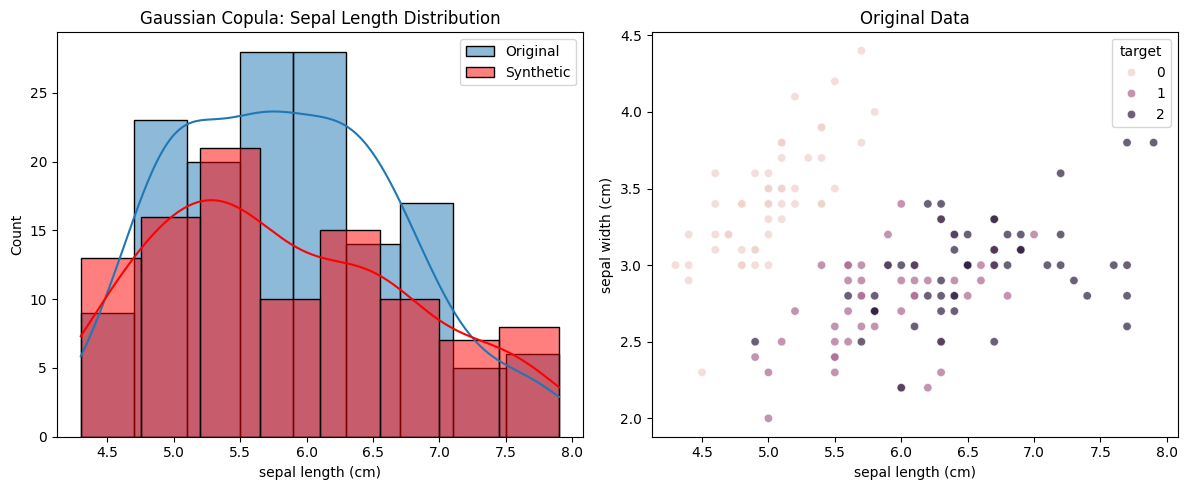

In [8]:
# Compare distributions of synthetic and original data for one feature
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='sepal length (cm)', kde=True, label='Original')
sns.histplot(data=synthetic_data_gaussian, x='sepal length (cm)', color='red', kde=True, label='Synthetic')
plt.legend()
plt.title('Gaussian Copula: Sepal Length Distribution')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='target', alpha=0.7)
plt.title('Original Data')

plt.tight_layout()
plt.show()

### 3.2 Using CTGAN Method

In [9]:
# Create a CTGAN generator
ctgan_generator = SyntheticDataGenerator(
    method='ctgan',
    epochs=300,  # Reduce for faster training
    batch_size=100,
    verbose=True,
    random_state=42
)

# Generate synthetic data using CTGAN
synthetic_data_ctgan = ctgan_generator.generate_from_dataset(
    dataset=db_dataset,
    num_samples=100
)

synthetic_data_ctgan.head()

/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.79) | Discrim. (-0.61): 100%|██████████| 300/300 [00:09<00:00, 31.47it/s]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.5,2.4,2.5,1.2,2
1,5.9,2.0,1.3,0.5,2
2,4.3,2.9,2.0,2.2,0
3,4.3,2.9,2.1,2.2,0
4,6.1,2.7,2.2,2.1,0


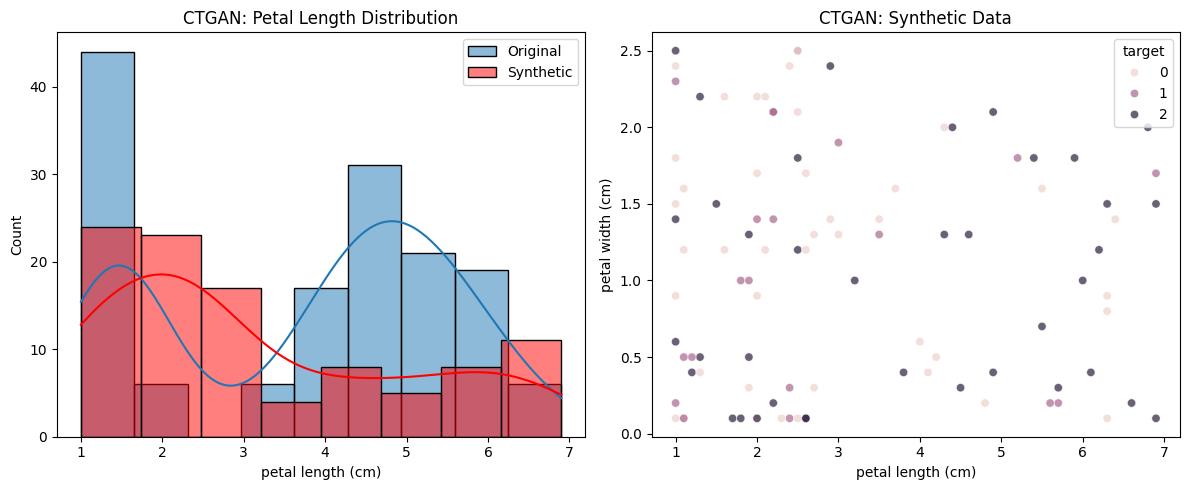

In [10]:
# Compare distributions of synthetic and original data for one feature
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='petal length (cm)', kde=True, label='Original')
sns.histplot(data=synthetic_data_ctgan, x='petal length (cm)', color='red', kde=True, label='Synthetic')
plt.legend()
plt.title('CTGAN: Petal Length Distribution')

plt.subplot(1, 2, 2)
sns.scatterplot(data=synthetic_data_ctgan, x='petal length (cm)', y='petal width (cm)', hue='target', alpha=0.7)
plt.title('CTGAN: Synthetic Data')

plt.tight_layout()
plt.show()

## 4. Creating Synthetic Data with Specific Conditions

We can generate synthetic data that satisfies specific conditions.

In [ ]:
conditional_generator = SyntheticDataGenerator(

In [11]:
# Create conditional generator
conditional_generator = SyntheticDataGenerator(
    method='gaussian_copula',
    random_state=42
)

# Define conditions for different classes
conditions = [
    {
        'column_values': {'target': 0},
        'num_rows': 30
    },
    {
        'column_values': {'target': 1},
        'num_rows': 30
    },
    {
        'column_values': {'target': 2},
        'num_rows': 30
    }
]

# Generate conditional synthetic data
conditional_data = conditional_generator.generate_from_dataset(
    dataset=db_dataset,
    num_samples=90,  # Will be overridden by condition counts
    conditions=conditions
)

# Verify the class distribution
conditional_data['target'].value_counts()

/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Sampling conditions: 100%|██████████| 90/90 [00:00<00:00, 767.13it/s]


target
0    30
1    30
2    30
Name: count, dtype: int64

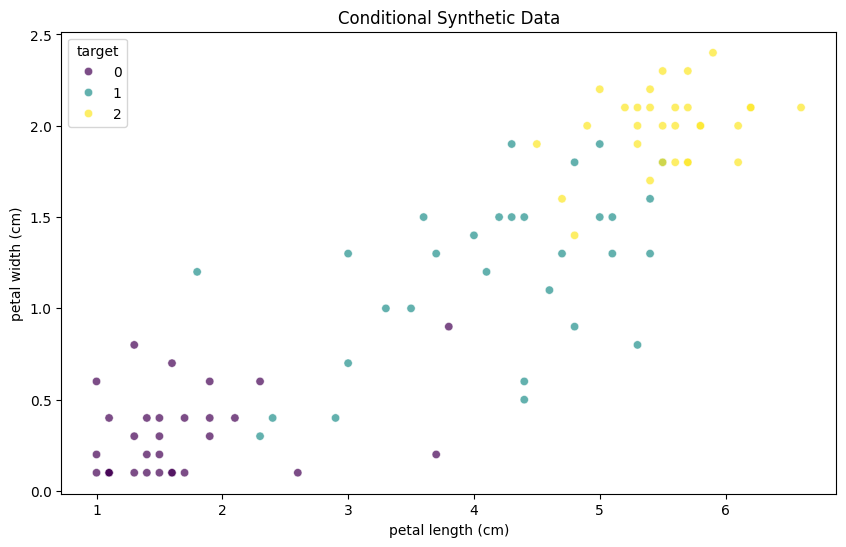

In [13]:
# Visualize the conditional data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='target',
    data=conditional_data,
    palette='viridis',
    alpha=0.7
)
plt.title('Conditional Synthetic Data')
plt.show()

## 5. Evaluating Synthetic Data Quality

We can evaluate how well our synthetic data preserves the statistical properties of the original data.

In [ ]:
# Import SDV's evaluation tools
try:
    from sdv.evaluation.single_table import evaluate_quality
    from sdv.metadata import SingleTableMetadata
    
    # Create metadata for evaluation
    metadata = SingleTableMetadata()
    for col in data.columns:
        if col == 'target':
            metadata.add_column(col, sdtype='categorical')
        else:
            metadata.add_column(col, sdtype='numerical')
    
    # Evaluate different synthetic datasets
    gaussian_quality = evaluate_quality(
        real_data=data,
        synthetic_data=synthetic_data_gaussian,
        metadata=metadata
    )
    
    ctgan_quality = evaluate_quality(
        real_data=data,
        synthetic_data=synthetic_data_ctgan,
        metadata=metadata
    )
    
    # Print quality scores
    print(f"Gaussian Copula Quality Score: {gaussian_quality.get_score():.2f}")
    print(f"CTGAN Quality Score: {ctgan_quality.get_score():.2f}")
    
    # Get details for Column Shapes score
    gaussian_details = gaussian_quality.get_details('Column Shapes')
    print("\nGaussian Copula Column Shapes:")
    print(gaussian_details)
    
except ImportError:
    print("SDV package not installed. To evaluate quality, install with 'pip install sdv'.")